In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package (in LPA)')

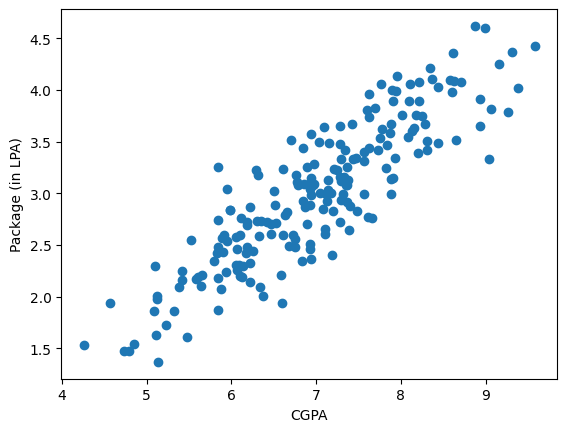

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package (in LPA)')

In [5]:
x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr = LinearRegression()

In [9]:
lr.fit(x_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package (in LPA)')

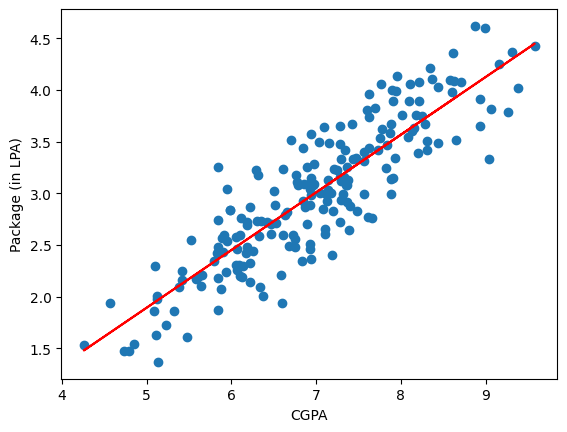

In [11]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package (in LPA)')

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [16]:
y_pred = lr.predict(x_test)

In [15]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [17]:
print('MAE',mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [18]:
print('MSE',mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [19]:
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [21]:
print('R2 Score',r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 Score 0.780730147510384


In [23]:
# Adjusted R2 Score
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

### Adding new column that has no relation with the output

In [24]:
new_df = df.copy()
new_df['random_feature'] = np.random.random(200)

new_df = new_df[['cgpa','random_feature','package']]
new_df.head()

,cgpa,random_feature,package
0,6.89,0.317525,3.26
1,5.12,0.549412,1.98
2,7.82,0.804355,3.25
3,7.42,0.150613,3.67
4,6.94,0.846630,3.57


Text(0, 0.5, 'package')

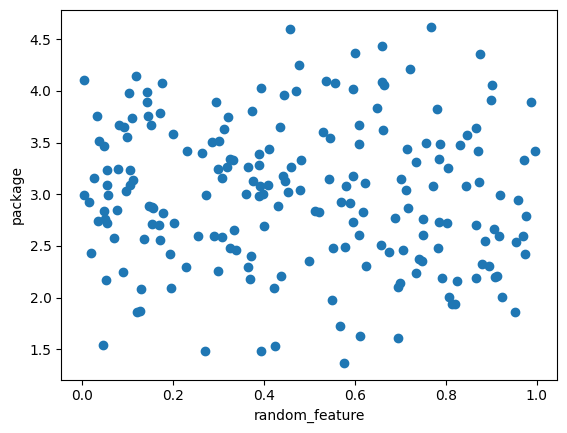

In [25]:
plt.scatter(new_df['random_feature'],new_df['package'])
plt.xlabel('random_feature')
plt.ylabel('package')

In [26]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred = lr.predict(x_test)

In [31]:
print('R2 Score',r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 Score 1.0


In [33]:
# Adjusted R2 Score
1 - ((1-r2)*(40-1)/(40-1-1))

1.0

### Adding new column that has relation with the output

In [34]:
new_df = df.copy()
new_df['iq'] = new_df['package'] + (np.random.randint(-12,12,200)/10)

new_df = new_df[['cgpa','iq','package']]
new_df.head()

,cgpa,iq,package
0,6.89,3.96,3.26
1,5.12,0.78,1.98
2,7.82,3.85,3.25
3,7.42,3.87,3.67
4,6.94,2.77,3.57


Text(0, 0.5, 'package')

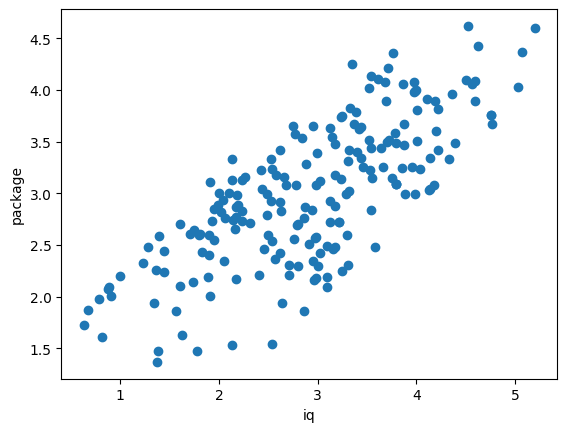

In [35]:
plt.scatter(new_df['iq'],new_df['package'])
plt.xlabel('iq')
plt.ylabel('package')

In [36]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(x_train,y_train)

LinearRegression()

In [41]:
y_pred = lr.predict(x_test)

In [42]:
print('R2 Score',r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 Score 1.0


In [43]:
# Adjusted R2 Score
1 - ((1-r2)*(40-1)/(40-1-1))

1.0